In [1]:
import pandas as pd

df = pd.read_csv('./stock-data.csv')

In [2]:
print(df.head())
print('\n')
print(df.info())

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
None


In [3]:
df['New_Date'] = pd.to_datetime(df['Date']) # 데이터 형변환을 위해 컬럼추가
df.info()
#새로운 컬럼 New_Date를 index로 설정
df.set_index('New_Date', inplace=True)
#기존의 컬럼 Date를 삭제
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   New_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


,Date,Close,Start,High,Low,Volume
New_Date,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039


In [4]:
# 1. 데이터확인 df.info(), df.head()
# 2. 날짜형으로 형변환(컬럼을 추가함)
# 3. 시계열 데이터를 인덱스로 지정
# 4. 기존의 자료삭제
# 5. 자료형 및 데이터 확인 df.info(), df.head()

df.drop('Date', axis=1, inplace=True)
df.head()

,Close,Start,High,Low,Volume
New_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [5]:
df.reset_index(inplace=True) #index reset : 인덱스 제거

In [6]:
df.head()

,New_Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [7]:
df['Year'] = df['New_Date'].dt.year
df['Month'] = df['New_Date'].dt.month
df['Day'] = df['New_Date'].dt.day

In [8]:
df.head()

,New_Date,Close,Start,High,Low,Volume,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018,6,26


In [9]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

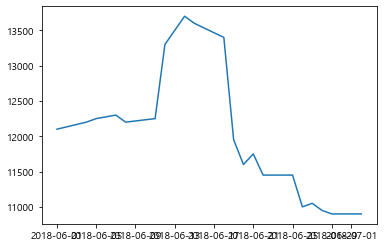

In [10]:
x = df['New_Date']
y = df['High']
plt.plot(x,y)

In [11]:
# 함수 매핑
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
df = titanic.loc[:, ['age','fare']]
df.head(2)

,age,fare
0,22.0,7.2500
1,38.0,71.2833


In [13]:
# 사용자 함수 정의 10을 덯는 함수
def add_10(a):
    return a+10

# 두 객체릐 합을 구하는 함수
def add_two_obj(a,b):
    return a + b
# 시리즈의 함수 적용할려면 먼저 함수를 적용하고 써야된다

In [14]:
# 시리즈 객체에 10을 더하는 함수를 적용
# 시리즈.apply(함수명) : 시리즈 각 원소에 함수를 적용
df['new_age'] = df['age'].apply(add_10)    # add_10(값 : df['age'의 원소의 값])

In [15]:
df['add_obj'] = df['age'].apply(add_two_obj, b=20)

In [16]:
df['age'].apply(lambda x: x+10) # lambda 함수를 적용

0      32.0
1      48.0
2      36.0
3      45.0
4      45.0
       ... 
886    37.0
887    29.0
888     NaN
889    36.0
890    42.0
Name: age, Length: 891, dtype: float64

In [17]:
df.head(2)

,age,fare,new_age,add_obj
0,22.0,7.2500,32.0,42.0
1,38.0,71.2833,48.0,58.0


In [18]:
# 시리즈.apply(함수명) : 시리즈 각 원소에 함수를 적용
# 데이터 프레임.applymap(함수명) : 데이타프레임에 함수 적용, 각 원소에

df_map = df.applymap(add_10)
# 데이터프레임의 각 열에 대해서 함수 매핑
result = df.apply(add_10, axis=0) # 데이터프레임에 apply(함수명,axis=0) << axis를 써줘야됨 apply 함수는  # 각 열에
 
# 최댁밧 - 최소값
df.apply(lambda x: x.max() - x.min())
result_row = df.apply(add_10, axis=1)  # 각 행에 함수 매핑
print(result_row.head(2))
print(df.head(2))

    age     fare  new_age  add_obj
0  32.0  17.2500     42.0     52.0
1  48.0  81.2833     58.0     68.0
    age     fare  new_age  add_obj
0  22.0   7.2500     32.0     42.0
1  38.0  71.2833     48.0     58.0


In [19]:
result.head(2)

,age,fare,new_age,add_obj
0,32.0,17.2500,42.0,52.0
1,48.0,81.2833,58.0,68.0


In [20]:
df = titanic.loc[:, ['age','fare']]
df.head(3)

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250


In [21]:
df.applymap(add_10).head(3)

,age,fare
0,32.0,17.2500
1,48.0,81.2833
2,36.0,17.9250


In [22]:
def min_max(x):
    return x.max() - x.min()

In [23]:
df.apply(min_max, axis=0)

age      79.5800
fare    512.3292
dtype: float64

In [24]:
df.apply(min_max, axis=1)

0      14.7500
1      33.2833
2      18.0750
3      18.1000
4      26.9500
        ...   
886    14.0000
887    11.0000
888     0.0000
889     4.0000
890    24.2500
Length: 891, dtype: float64

In [25]:
#df['add'] = df.apply(lambda x: add_two_obj(x['age'], x['fare']), axis=1)
df['add'] = df.apply(lambda x : x['age'] + x['fare'], axis=1)

In [26]:
df.head()

,age,fare,add
0,22.0,7.2500,29.2500
1,38.0,71.2833,109.2833
2,26.0,7.9250,33.9250
3,35.0,53.1000,88.1000
4,35.0,8.0500,43.0500


In [27]:
# pipe 함수 알아보기
df = titanic.loc[:, ['age','fare']]

# 각 열의 NaN 찾기 - 데이터프레임을 전달하면 데이터프레임 반환
def missing_value(x):
    return x.isnull()
# 각 열의 NaN 개수 반환 - 데이터프레임을 전달하면 시리즈 반환
def missing_count(x):
    return missing_value(x).sum()
# 데이터프레임의 총 NaN 개수 - 데이터프레임 전달하면 값을 반환
def totoal_number_missing(x):
    return missing_count(x).sum()

In [28]:
result_df = df.pipe(missing_value)
result_ser = df.pipe(missing_count)
print(result_df)

       age   fare
0    False  False
1    False  False
2    False  False
3    False  False
4    False  False
..     ...    ...
886  False  False
887  False  False
888   True  False
889  False  False
890  False  False

[891 rows x 2 columns]


In [29]:
result_value = df.pipe(totoal_number_missing)

In [30]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [31]:
df = titanic.loc[0:4, 'survived':'age']
# 열이름의 리스트 만들기
columns = list(df.columns.values)
columns

['survived', 'pclass', 'sex', 'age']

In [32]:
# 열 이름을 앞파벳 순으로 정렬
new_columns = sorted(columns)
new_columns

# 열 이름을 정렬한 데이터프레임 생성
df_sorted = df[new_columns]
df_sorted

,age,pclass,sex,survived
0,22.0,3,male,0
1,38.0,1,female,1
2,26.0,3,female,1
3,35.0,1,female,1
4,35.0,3,male,0


In [33]:
# 열 이름을 역으로 정렬하기
df_reversed = df[reversed(columns)]
df_reversed

,age,sex,pclass,survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0


In [34]:
# 열 분리
df = pd.read_excel('./주가데이터.xlsx')

In [35]:
# 1. 연월일을 문자열로 변경
df['연월일'] = df['연월일'].astype('str')
# 2. 연월일을 "~"기준으로 split
dates = df['연월일'].str.split('-')
dates
# 3. 데이터프레임에 '연', '월', ' 일' 컬럼을 추가
# 리스트들에서 각 리스트의 동일 위치릐 원소를 추출하고자 할 경우
# 시리즈.str.get(위치인덱스)
df['연'] = dates.str.get(0) # dates 변수의 원소 리스트의 0번째 인덱스 값 전체를 가져옴
df['월'] = dates.str.get(1) # dates 변수의 원소 리스트의 1번째 인덱스 값 전체를 가져옴
df['일'] = dates.str.get(2) # dates 변수의 원소 리스트의 2번째 인덱스 값 전체를 가져옴

In [36]:
s_list = pd.Series([['1','2','3'],['abc','a','c'],['10','20','30']])
s_list.str.get(1)
# 시리즈 리스트에서

0     2
1     a
2    20
dtype: object

In [37]:
df.head(3)
type(df['연월일'])
df.dtypes

연월일     object
당일종가     int64
전일종가     int64
시가       int64
고가       int64
저가       int64
거래량      int64
연       object
월       object
일       object
dtype: object

In [38]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [39]:
# 나이가 10대(10~19세)인 승객만 따로 선택
mask_age = (titanic.age >= 10) & (titanic.age < 20)
mask_age.values
df_teenage = titanic.loc[mask_age, : ]
### df_teenage.describe()
### df_teenage.info()

In [40]:
# 나이가 10세 미만 60세 이상인 승객의 age, fare, sex, class, alive 컬럼 정보만 출력

In [41]:
mask1 = (titanic.age < 10) | (titanic.age >= 60)
df_alive = titanic.loc[mask1,['age','fare','sex','class','alive']]
# df_alive

In [42]:
# 나이가 10세 미만(0~9)이고 여성인 승객만 따로 선택
df_female = titanic.loc[(titanic.age < 10) & (titanic.sex == 'female'), : ]

In [43]:
# 함계 탑슬한 형제 또는 배우자의 수가 3, 4, 5인 승객만 따로 추출 - 불린 인덱싱

In [44]:
mask2 = (titanic['sibsp'] == 3) | (titanic['sibsp'] == 4) | (titanic['sibsp'] == 5)
df_bollean = titanic[mask2]
df_bollean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
63,0,3,male,4.0,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,yes,False
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,NaN,Southampton,no,False
85,1,3,female,33.0,3,0,15.8500,S,Third,woman,False,NaN,Southampton,yes,False


In [45]:
# isin() 메서드를 활용하여 간편하게 추출
mask3 = titanic['sibsp'].isin([3, 4, 5])
df_isin = titanic.loc[mask3, ['age','fare','sex','sibsp']]
df_isin.head()

,age,fare,sex,sibsp
7,2.0,21.0750,male,3
16,2.0,29.1250,male,4
24,8.0,21.0750,female,3
27,19.0,263.0000,male,3
50,7.0,39.6875,male,4


In [46]:
# 원하는 데이터만 추출 boolean mask 이용 , isin() 이용

In [47]:
import pandas as pd
# 데이터프레임 합치기 : pandas.concat(데이터프레임 리스트)
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

In [48]:
df3 = pd.concat([df1, df2]) # 위에서 아래로 행을 붙이듯이 이어 줌
df3
# 기존의 인덱스 무시하고 새로운 인덱스 부여
df4 = pd.concat([df1, df2], ignore_index=True)
df4

#열로 붙이기
df5 = pd.concat([df,df2], axis=1)
df5

#join 키워드 == 'outer', ' inner' : 교집합
df6 = pd.concat([df1,df2], axis=1, join='inner')
df6

,a,b,c,a,b,c,d
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3


In [49]:
sr1 = pd.Series(['e0', 'e1', 'e2', 'e3'], name='e')
sr2 = pd.Series(['f0', 'f1', 'f2'], name='f', index=[3, 4, 5])
sr3 = pd.Series(['g0', 'g1', 'g2', 'g3'], name='g')

# df1 과 sr1을 좌우 열 방향으로 연결하기 (index없음)
df_s1 = pd.concat([df1,sr1], axis=1)
df_s1

#df12 과 sr2을 좌우 열 방향으로 연결하기 (시리즈에 인덱스 존재함)
df_s2 = pd.concat([df2,sr2], axis=1)
df_s2

# sr1 과 sr3을 좌우 열 방향으로 연결하기 (결과 :데이타프레임)
sr1_sr3 = pd.concat([sr1,sr3], axis=1, sort=True)
print(sr1_sr3)

# sr1 과 sr3을 위아래 행방향으로 연결하기 (경과 :시리즈)
sr4 = pd.concat([sr1,sr3], axis=0)
sr4

    e   g
0  e0  g0
1  e1  g1
2  e2  g2
3  e3  g3


0    e0
1    e1
2    e2
3    e3
0    g0
1    g1
2    g2
3    g3
dtype: object

In [50]:
import pandas as pd

In [51]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.unicode.east_asian_width', True)

In [52]:
# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./stock_price.xlsx')
df2 = pd.read_excel('./stock_valuation.xlsx')

In [53]:
# 데이터프레임 합치기 - 교집합
merge_inner = pd.merge(df1,df2)
merge_inner

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [54]:
# 데이터프레임 합치기 합집합
merge_outer = pd.merge(df1,df2, how='outer', on='id')
merge_outer

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500.0,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400.0,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [55]:
#데이터프레임 합치기 - 왼쪽프레임 기준, 키 값 분리, how='left', left_on=컬럼명
merge_left = pd.merge(df1,df2, how='left', left_on='id',right_on='id')
merge_left

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [56]:
#데이터프레임 합치기 - 오른쪽프레임 기준, 키 값 분리, how='left', left_on=컬럼명
merge_right = pd.merge(df1,df2, how='right', left_on='id',right_on='id')
merge_right

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,NaN,NaN,NaN,하림,274.166667,3551,11.489362,0.887074
2,138040,NaN,NaN,NaN,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090,14.283226,0.758627
5,161390,NaN,NaN,NaN,한국타이어,5648.500000,51341,7.453306,0.820007
6,181710,NaN,NaN,NaN,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684,25.185866,2.470259
8,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335,40.802348,0.651359
9,207940,NaN,NaN,NaN,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [57]:
# 불린 인덱싱과 결합하여 원하는 데이터 찾기
price = df1[df1['price'] < 50000]
value = pd.merge(price, df2)
value

,id,stock_name,value,price,name,eps,bps,per,pbr
0,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [58]:
df1.set_index('id', inplace=True)
df2.set_index('id', inplace=True)

In [59]:
# 데이터프레임 결합(join) - 교집합 , 인덱스로 병합
df3 = df1.join(df2, how='inner') # how : left, right, outer, inner
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [60]:
titanic['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['Third', 'First', 'Second']

In [62]:
df = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]
len(df)

891

In [68]:
# class 열을 기준으로 분할
grouped = df.groupby(['class'])
grouped.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
6,54.0,male,First,51.8625,0
7,2.0,male,Third,21.0750,0
9,14.0,female,Second,30.0708,1
11,58.0,female,First,26.5500,1


In [69]:
group3 = grouped.get_group('Third')
print(group3)

      age     sex  class     fare  survived
0    22.0    male  Third   7.2500         0
2    26.0  female  Third   7.9250         1
4    35.0    male  Third   8.0500         0
5     NaN    male  Third   8.4583         0
7     2.0    male  Third  21.0750         0
..    ...     ...    ...      ...       ...
882  22.0  female  Third  10.5167         0
884  25.0    male  Third   7.0500         0
885  39.0  female  Third  29.1250         0
888   NaN  female  Third  23.4500         0
890  32.0    male  Third   7.7500         0

[491 rows x 5 columns]


In [73]:
df = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]
# class 열을 기준으로 분할
grouped = df.groupby(['class'])

#각 그룹에 대한 모든열의 표준 편차를 집계하여 데이터프레임으로 변환
std_all = grouped.std()
std_all

#각 그룹에 대한 fara 열의 표준편차를 집계하여 시리즈로 변환
grouped.fare.std()

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

In [76]:
grouped_two = df.groupby(['class', 'sex'])
average_two = grouped_two.mean()
average_two
#grouped_two 그룹객체에서 개별 그룹선택하기
grouped_two.get_group(('Third','female'))

# 여러 함수를 각 열에 동일하게 적용하여 집계
agg_all = grouped.agg(['min', 'max'])
agg_all

# 각 열마다 다른 함수를 적용하여 집계
agg_sep = grouped.agg({'fare':['min', 'max'], 'age':'mean'})
agg_sep

fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620

In [ ]:
# sql 문장
# select 보여주는리스트
# from 테이블 또는 뷰 (데이터프레임)
# where (조인, 머지 조건)
# group by (원하는 컬럼 또는 컬럼의 조합으로그룹)
# having 그룹에 함수 적용을 해서 조건
# order by 정렬

# grouped = df.groupby(컬럼 또는 컬럼리스트)
# grouped.함수() (min,max,mean,std..)
# grouped.get_group(원하는 그룹의 컬럼리스트)
# grouped.agg([함수리스트])
# grouped.agg([컬럼명;[함수리스트],컬럼명:함수])

# 데이터개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로반환
# grouped.filter(lambda x:len(x) >=200)
# age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터 프레임으로 반환
# grouped.filter(lambda X: x.age.mean() < 30)
# grouped.apply(lambda x: x.age.mean() < 30)

In [77]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [78]:
grouped_filter = grouped.filter(lambda x:len(x) >=200)
print(grouped_filter.head())

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


In [86]:
age_filter = grouped.apply(lambda x: x.age.mean() < 30)
print(age_filter.tail())

class   sex   
First   male      False
Second  female     True
        male      False
Third   female     True
        male       True
dtype: bool


In [87]:
age_filter = grouped.filter(lambda x: x.age.mean() < 30)
print(age_filter.tail())

      age     sex  class     fare  survived
882  22.0  female  Third  10.5167         0
884  25.0    male  Third   7.0500         0
885  39.0  female  Third  29.1250         0
888   NaN  female  Third  23.4500         0
890  32.0    male  Third   7.7500         0


In [84]:
grouped = df.groupby(['class','sex'])

gdf = grouped.mean()
gdf

#class 값이 First인 행을 선택
gdf.loc['First']

#class 값이 First이고 sex 값이 male인 행을 선택
gdf.loc[('First','male')]

#sex 값이 male인 행을 선택 : 그룹함수결과.xs(그룹컬럼의 값, level=그룹컬럼명)
gdf.xs('male',level='sex')

,age,fare,survived
class,,,
First,41.281386,67.226127,0.368852
Second,30.740707,19.741782,0.157407
Third,26.507589,12.661633,0.135447


In [ ]:
pdf1 = pd.pivot_table(df,              #피벗할 데이터프레임
                      index='class',   #행 위치에 들어갈 열
                      columns='sex',   #열 위치에 들어갈 열 
                      values='age',    #데이터로 사용할 열
                      aggfunc='mean')  #데이터 집계 함수
pdf1

pdf2 = pd.pivot_table(df,              #피벗할 데이터프레임
                      index='class',   #행 위치에 들어갈 열
                      columns='sex',   #열 위치에 들어갈 열 
                      values='age',    #데이터로 사용할 열
                      aggfunc=['mean','sum'])  #데이터 집계 함수
pdf2
pdf2.xs('First')
df3 = pd.pivot_table(df,              #피벗할 데이터프레임
                      index='class',   #행 위치에 들어갈 열
                      columns='sex',   #열 위치에 들어갈 열 
                      values='age',    #데이터로 사용할 열
                      aggfunc=['mean','sum'])  #데이터 집계 함수
pdf3.xs('first') #('First', 'female'), ('male', level='sex')
                 #('second', 'male'), level[0, 'sex']
                 # ('mean', axis=1), ('mean', 'age'), axis=1)
                 # ('max', 'fare', 0), level=[0,1,2], axis=1)  